In [1]:
import json
from ase.io import read, write
from ase import Atoms
import numpy as np
from tqdm.auto import tqdm
from matplotlib import pyplot as plt

In [5]:
ds = json.load(open('chemiscope_C.json',"r"))

In [6]:
frames = [
    Atoms(cell=np.reshape(s['cell'], (3, 3)),
          symbols=s['names'],
          positions=np.vstack([s['x'], s['y'], s['z']]).T)
    for s in tqdm(ds['structures'])
]

  0%|          | 0/3430 [00:00<?, ?it/s]

In [7]:
NC = sum(len(np.where(frame.numbers==6)[0]) for frame in frames)

In [8]:
NH = np.zeros(NC)
counter = 0
for frame in tqdm(frames):
    for i in np.where(frame.numbers == 6)[0]:
        NH[counter] = len(
            np.where(
                np.logical_and(
                    frame.numbers == 1,
                    frame.get_distances(i, np.arange(len(frame)), mic=True) <
                    1.28))[0])
        counter += 1

  0%|          | 0/3430 [00:00<?, ?it/s]

In [11]:
import chemiscope

props = {
    **{k: ds['properties'][k]['values']
       for k in ds['properties']},
    'NH': NH,
    "H0": [1 if nh == 0 else np.nan for nh in NH],
    "H1": [1 if nh == 1 else np.nan for nh in NH],
    "H2": [1 if nh == 2 else np.nan for nh in NH],
    "H3": [1 if nh == 3 else np.nan for nh in NH],
}
widget = chemiscope.show(frames,
                         props,
                         environments=[(e['structure'], e['center'],
                                        e['cutoff'])
                                       for e in ds['environments']])

In [12]:
widget.save('chemiscope2.json')

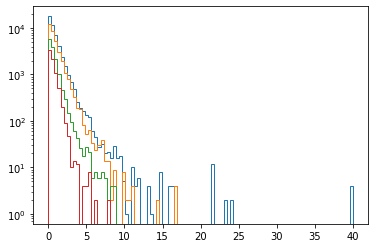

In [13]:
bins = np.linspace(min(ds['properties']['NMR errors']['values']),
                   max(ds['properties']['NMR errors']['values']), 100)


plt.hist(np.array(
    ds['properties']['NMR errors']['values'])[np.where(NH == 0)[0]],
         bins=bins,
         histtype='step')
plt.hist(np.array(
    ds['properties']['NMR errors']['values'])[np.where(NH == 1)[0]],
         bins=bins,
         histtype='step')
plt.hist(np.array(
    ds['properties']['NMR errors']['values'])[np.where(NH == 2)[0]],
         bins=bins,
         histtype='step')
plt.hist(np.array(
    ds['properties']['NMR errors']['values'])[np.where(NH == 3)[0]],
         bins=bins,
         histtype='step')
plt.gca().set_yscale('log')
plt.show()